In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydmd import DMD
#from vmdpy import VMD

ModuleNotFoundError: No module named 'pydmd'

In [5]:
import scipy.linalg as sl

### Data Manipulation

In [7]:
df = pd.read_csv("rain_data_31011.csv")
df

date = df["YYYY-MM-DD"]

daily_rain = df["daily_rain"]

df["year"] = pd.DatetimeIndex(df["YYYY-MM-DD"]).year

data = df[["YYYY-MM-DD","daily_rain","year"]]
data["year"].value_counts()

# %%
# rm_2022 = data["year"] == 2022
# count = 0
# for i in rm_2022:
#     count += 1
#     if i == True:        
#         print(count)
#         break

data = data[:4383]
data["year"].value_counts()

def function(data,daily_rain,year_1,year_2):
    year = year_1.split("-",1)[0]
    index_1 = data[df["YYYY-MM-DD"] == year_1].index[0]
    index_2 = data[df["YYYY-MM-DD"] == year_2].index[0]
    avg = (daily_rain[index_1]+daily_rain[index_2])/2
    data = data.drop([index_1,index_2])
    upper = data[:index_1]
    lower = data[index_1:]
    r =  pd.Series(data={'YYYY-MM-DD' : year_1,'daily_rain' : avg,'year' : int(year)},name=str(index_1))
   
    upper = upper.append(r,ignore_index=False)
    data = pd.concat([upper,lower])
    data.index = [*range(data.shape[0])]
    return data

data = function(data,daily_rain,"2012-02-28","2012-02-29")
data = function(data,daily_rain,"2016-02-28","2016-02-29")
data = function(data,daily_rain,"2020-02-28","2020-02-29")

data

new_df = pd.DataFrame()
for i,j in zip(data[["daily_rain","year"][:2][0]],data[["daily_rain","year"][:2][1]]):  
    new_df[j] = ""    

new_df.columns

z = pd.Series([1],index=[2010])

new_df.append({2010 : [[1],[2]]},ignore_index=True)

new_df.columns

count = 0
year_index_list = []
for i in new_df.columns:
    year_bool = data["year"] == i
    for j in year_bool: 
        count += 1
        if j == True:        
            year_index_list.append(count-2)
            break

year_index_list

data["year"]

arr_list = []
st = 0
count = 0
for i in range(365,4745,365):
    arr = []
    count += 1
    for j in range(st,i):
        arr.append(data["daily_rain"][j])
    arr_list.append(arr)
    st = count*365
    
final_data = np.asarray(arr_list).T


C:\Users\anied\AppData\Local\Temp/ipykernel_25480/2193855452.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index_1 = data[df["YYYY-MM-DD"] == year_1].index[0]
C:\Users\anied\AppData\Local\Temp/ipykernel_25480/2193855452.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index_2 = data[df["YYYY-MM-DD"] == year_2].index[0]


In [3]:
np.linalg.matrix_rank(final_data)

12

### Singular Value Plot

Text(0, 0.5, 'value')

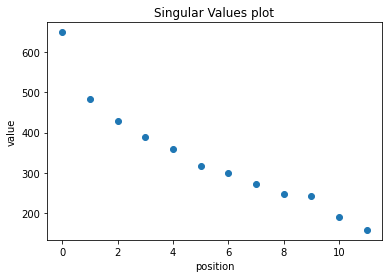

In [11]:
fig = plt.plot(sl.svdvals(np.array([snapshot.flatten() for snapshot in final_data]).T), 'o')
plt.title("Singular Values plot");
plt.xlabel("position")
plt.ylabel("value")

[648.95220049 483.73774036 429.44664501 388.64871717 359.05638452
 317.40084368 300.14159008 273.2055153  248.45248423 242.33164468
 191.2898975  158.12073054]


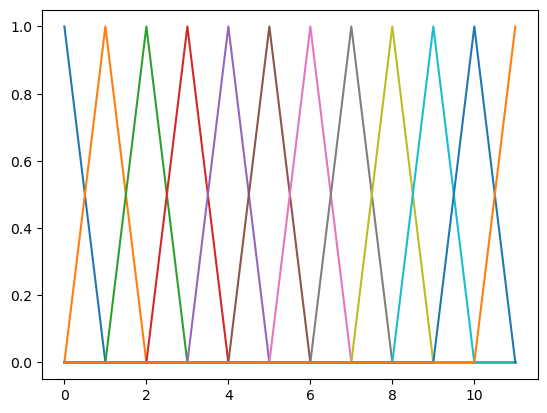

In [4]:
u,s,v = np.linalg.svd(final_data)
print(s)
plt.plot(np.diag(s)/(sum(np.diag(s))))
plt.show()


In [12]:
dmd = DMD(svd_rank=1, tlsq_rank=2, exact=True, opt=True)
dmd.fit(final_data)
dmd.plot_modes_2D(figsize=(12,5))

NameError: name 'DMD' is not defined

In [5]:
dmd =  DMD(svd_rank=3)
dmd.fit(final_data)

c:\Users\chait\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


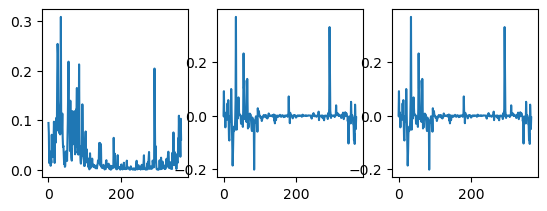

In [6]:
mode1, mode2, mode3 = dmd.modes.T
plt.subplot(2,3,1)
plt.plot(mode1)

plt.subplot(2,3,2)
plt.plot(mode2)

plt.subplot(2,3,3)
plt.plot(mode3)

plt.show()

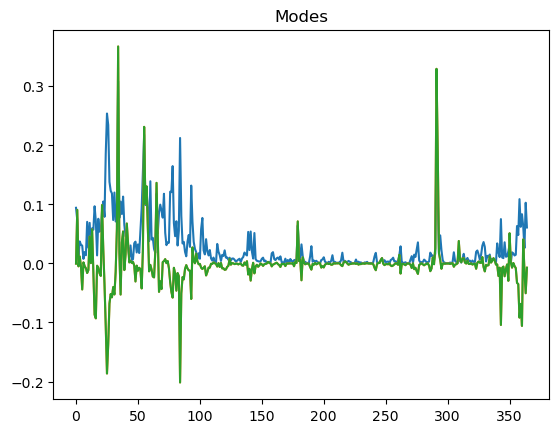

In [7]:
for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title('Modes')
plt.show()


VMD

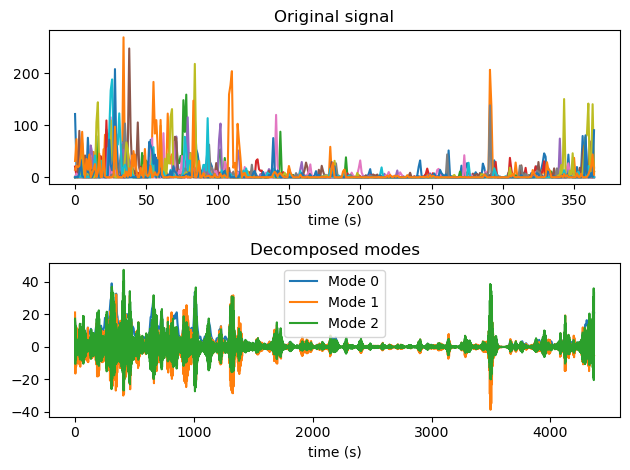

In [8]:
alpha = 2000       # moderate bandwidth constraint  
tau = 0.            # noise-tolerance (no strict fidelity enforcement)  
K = 3              # 3 modes  
DC = 0             # no DC part imposed  
init = 1           # initialize omegas uniformly  
tol = 1e-7  


#. Run VMD 
u, u_hat, omega = VMD(final_data, alpha, tau, K, DC, init, tol)  

#. Visualize decomposed modes
plt.figure()
plt.subplot(2,1,1)
plt.plot(final_data)
plt.title('Original signal')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(u.T)
plt.title('Decomposed modes')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()

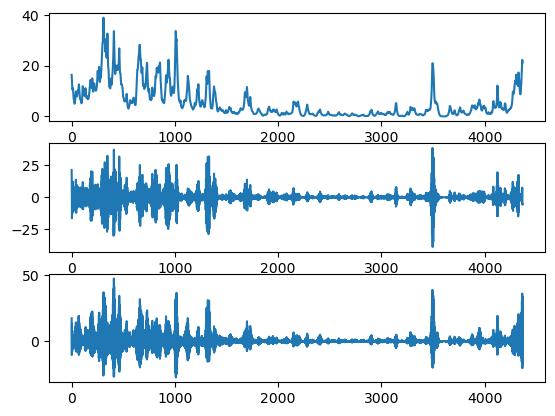

In [9]:
mode1 = u[0,:]
mode2 = u[1,:]
mode3 = u[2,:]

plt.subplot(3,1,1)
plt.plot(mode1)

plt.subplot(3,1,2)
plt.plot(mode2)

plt.subplot(3,1,3)
plt.plot(mode3)

plt.show()



In [10]:
def DMD(data, r):
    """Dynamic Mode Decomposition (DMD) algorithm."""
    
    ## Build data matrices
    X1 = data[:, : -1]
    X2 = data[:, 1 :]
    ## Perform singular value decomposition on X1
    u, s, v = np.linalg.svd(X1, full_matrices = False)
    ## Compute the Koopman matrix
    A_tilde = u[:, : r].conj().T @ X2 @ v[: r, :].conj().T * np.reciprocal(s[: r])
    ## Perform eigenvalue decomposition on A_tilde
    Phi, Q = np.linalg.eig(A_tilde)
    ## Compute the coefficient matrix
    Psi = X2 @ v[: r, :].conj().T @ np.diag(np.reciprocal(s[: r])) @ Q
    A = Psi @ np.diag(Phi) @ np.linalg.pinv(Psi)
    
    return A_tilde, Phi, A

In [ ]:
DMD(final_data,12)

(array([[ 0.78791823, -0.03246814, -0.15442692],
        [-0.00494281, -0.21836477,  0.32585064],
        [-0.26187233, -0.17416266, -0.2765766 ]]),
 array([ 0.82522801+0.j        , -0.26612557+0.23447256j,
        -0.26612557-0.23447256j]),
 array([[6.53076688e-04+1.09333263e-18j, 1.43029125e-03-3.96147617e-18j,
         1.85433916e-04+2.42098969e-18j, ...,
         7.39343983e-04+1.19117646e-19j, 1.85430984e-03+4.50708619e-19j,
         4.13216647e-04+8.86906472e-19j],
        [1.20171694e-03+1.44148574e-18j, 2.46465921e-03-5.41495786e-18j,
         3.42589974e-04+3.29849061e-18j, ...,
         1.32002980e-03+1.58507939e-19j, 3.65035842e-03+5.78697422e-19j,
         1.49665317e-03+1.14379885e-18j],
        [1.88138454e-04+3.22690969e-19j, 4.12443614e-04-1.15317488e-18j,
         5.34151941e-05+7.03165018e-19j, ...,
         2.12734429e-04+3.44409795e-20j, 5.30519683e-04+1.42468758e-19j,
         1.15783262e-04+2.53478197e-19j],
        ...,
        [9.06552050e-04+9.17310370e-19j, 1.